# Loan Approval Prediction


## Problem Statement

-  The goal of this project is to develop a predictive model that determines whether a loan application will be approved or not based on applicant details. The dataset contains demographic, financial, and credit history information such as applicant income, co-applicant income, loan amount, loan term, education, employment status, and property area.


-   The objective is to train and evaluate classification models (Logistic Regression, Decision Tree, and Random Forest) to accurately predict loan approval status (Loan_Status). Special emphasis is placed on recall, since failing to identify eligible applicants or approving risky ones can significantly impact both customers and the lending institution.

## Business Problem
The bank wants to automate the loan eligibility process.  
Currently, loan approval depends on the manual evaluation of the applicant’s details.  
The goal is to build a machine learning model that can:
1. Predict loan approval status automatically.
2. Reduce human errors and biases in decision-making.
3. Ensure that eligible applicants are identified correctly (focus on **high recall**).


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [252]:
df=pd.read_csv(r"C:\Users\Avinash\Downloads\Loan Approval Prediction data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Information
- **Number of Rows:** 614
- **Number of Columns:** 13
- **Target Column:** `Loan_Status`
- **Features:**
  - Loan_ID : Unique loan identifier
  - Gender : Male/Female
  - Married : Applicant marital status
  - Dependents : Number of dependents
  - Education : Graduate/Not Graduate
  - Self_Employed : Employment status
  - ApplicantIncome : Applicant’s income
  - CoapplicantIncome : Co-applicant’s income
  - LoanAmount : Loan amount applied
  - Loan_Amount_Term : Term of loan in months
  - Credit_History : Credit history meets guidelines (1 = good, 0 = bad)
  - Property_Area : Urban/Semiurban/Rural
  - Loan_Status : Loan approved (Y/N)


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## NUll values

In [254]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [255]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

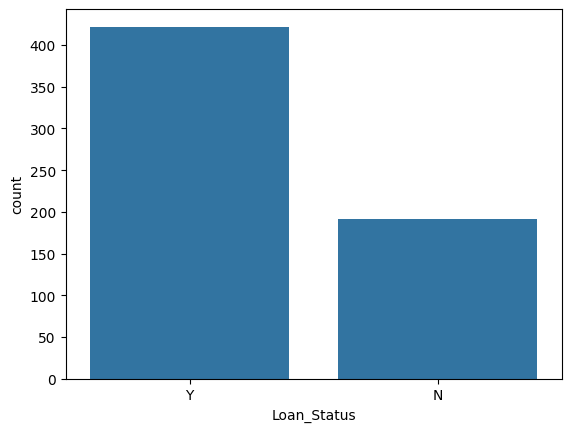

In [256]:
#plt.figure(figsize=(8,5))
sns.countplot(x="Loan_Status", data=df)
plt.show()

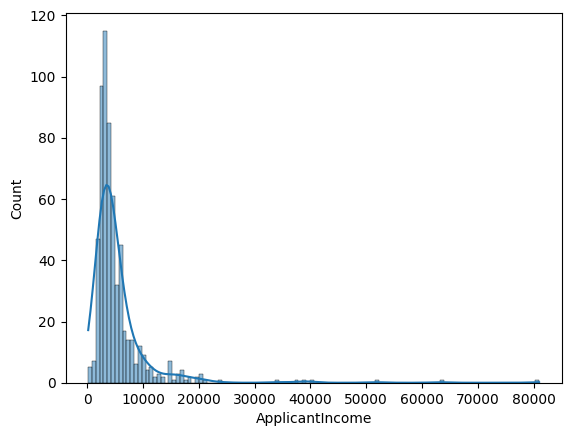

In [257]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.show()

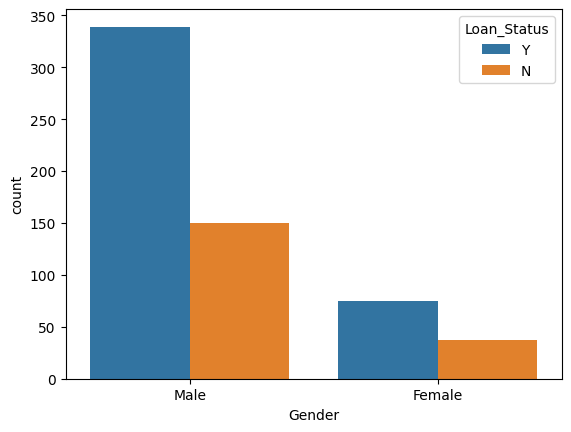

In [258]:
sns.countplot(x="Gender", hue="Loan_Status", data=df)
plt.show()

In [115]:
df['Loan_ID'].nunique()

614

In [260]:
# Unnecessary column in preidction
df.drop('Loan_ID', axis=1, inplace=True)

## Filling null values

In [117]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [118]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [119]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [120]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [121]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [122]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [123]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [124]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

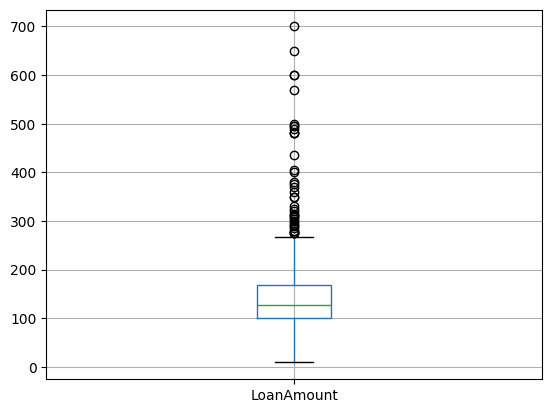

In [125]:
df.boxplot(column='LoanAmount')
plt.show()

In [126]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [127]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
df['Loan_Amount_Term'].nunique()

10

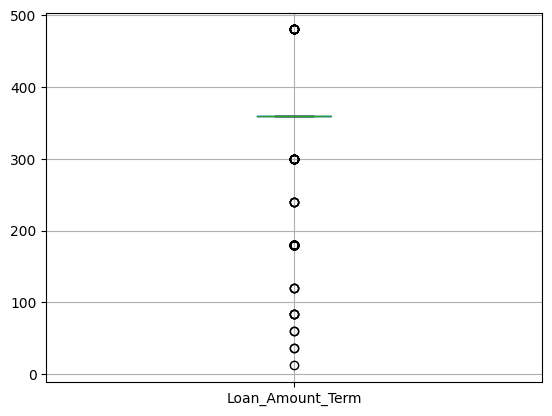

In [129]:
df[['Loan_Amount_Term']].boxplot()
plt.show()

In [130]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)


In [131]:
df["Loan_Amount_Term_Years"] = df["Loan_Amount_Term"] / 12
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_Years
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,30.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,30.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,30.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,30.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,30.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,15.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,30.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,30.0


In [132]:
df['Credit_History'].nunique()

2

In [133]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [134]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [135]:
df.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Loan_Amount_Term_Years    0
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    object 
 2   Dependents              614 non-null    object 
 3   Education               614 non-null    object 
 4   Self_Employed           614 non-null    object 
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    object 
 11  Loan_Status             614 non-null    object 
 12  Loan_Amount_Term_Years  614 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


## Feature Encoding (One-hot encoding, Label encoding)

In [137]:
lable = LabelEncoder()
df['Gender']=lable.fit_transform(df['Gender'])

In [138]:
df['Gender'].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [139]:
df['Married']=lable.fit_transform(df['Married'])

In [140]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [141]:
df['Dependents']=df['Dependents'].replace('3+',3).astype(int)

In [142]:
df=pd.get_dummies(df,columns=['Dependents'])
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_Years,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,30.0,True,False,False,False
1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,30.0,False,True,False,False
2,1,1,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,30.0,True,False,False,False
3,1,1,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,30.0,True,False,False,False
4,1,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,30.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,30.0,True,False,False,False
610,1,1,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,15.0,False,False,False,True
611,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,30.0,False,True,False,False
612,1,1,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,30.0,False,False,True,False


In [143]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [144]:
df['Education']=lable.fit_transform(df['Education'])

In [145]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [146]:
df['Self_Employed']=lable.fit_transform(df['Self_Employed'])

In [147]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [148]:
df=pd.get_dummies(df,columns=['Property_Area'])

In [149]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_Term_Years,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Y,30.0,True,False,False,False,False,False,True
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,N,30.0,False,True,False,False,True,False,False
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Y,30.0,True,False,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Y,30.0,True,False,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Y,30.0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Y,30.0,True,False,False,False,True,False,False
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,Y,15.0,False,False,False,True,True,False,False
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Y,30.0,False,True,False,False,False,False,True
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,Y,30.0,False,False,True,False,False,False,True


In [150]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [151]:
df['Loan_Status']=lable.fit_transform(df['Loan_Status'])

In [152]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_Term_Years,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,30.0,True,False,False,False,False,False,True
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,30.0,False,True,False,False,True,False,False
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,30.0,True,False,False,False,True,False,False
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,1,15.0,False,False,False,True,True,False,False
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,30.0,False,True,False,False,False,False,True
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,1,30.0,False,False,True,False,False,False,True


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Loan_Amount_Term_Years   614 non-null    float64
 11  Dependents_0             614 non-null    bool   
 12  Dependents_1             614 non-null    bool   
 13  Dependents_2             614 non-null    bool   
 14  Dependents_3             6

In [154]:
df.isna().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Loan_Amount_Term_Years     0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3               0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## Check Outliers

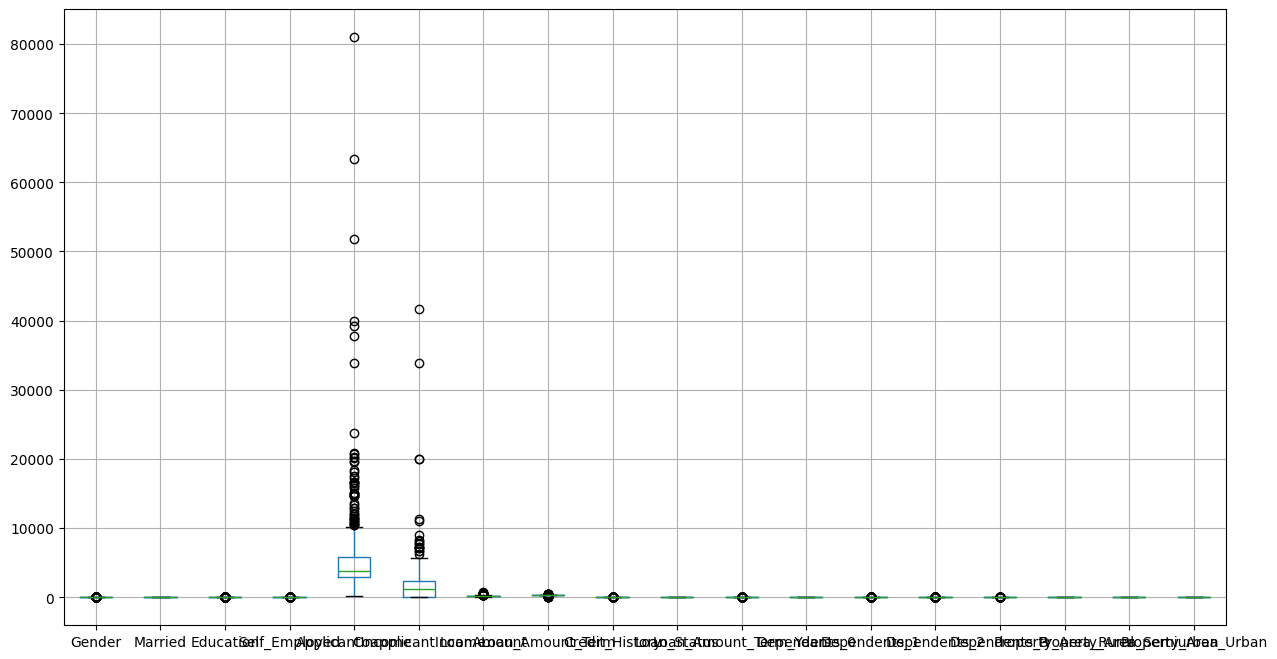

In [155]:

plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

In [156]:
#from datasist.structdata import detect_outliers
from datasist.structdata import detect_outliers

DF = df.select_dtypes(include="number")

for col in DF.columns:
    outliers = detect_outliers(df, 0, [col])  
    print(f"{col}: {len(outliers)} outliers")

Gender: 112 outliers
Married: 0 outliers
Education: 134 outliers
Self_Employed: 82 outliers
ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 41 outliers
Loan_Amount_Term: 88 outliers
Credit_History: 89 outliers
Loan_Status: 0 outliers
Loan_Amount_Term_Years: 88 outliers


## Capping outliers with IQR

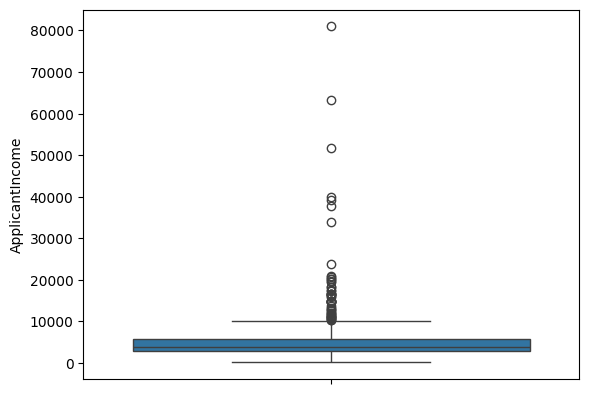

In [157]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

In [158]:
q1=df['ApplicantIncome'].quantile(0.25)
q2=df['ApplicantIncome'].quantile(0.5)
q3=df['ApplicantIncome'].quantile(0.75)

print('Q1 ==', q1)
print('Q2 ==', q2)
print('Q3 ==', q3)

iqr = q3 - q1
print('IQR == ',iqr )

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print('Upper Limit == ', upper_limit)
print('Lower Limit == ', lower_limit)

Q1 == 2877.5
Q2 == 3812.5
Q3 == 5795.0
IQR ==  2917.5
Upper Limit ==  10171.25
Lower Limit ==  -1498.75


In [159]:
df[(df['ApplicantIncome']> upper_limit)].shape

(50, 18)

In [160]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_limit, upper_limit, df['ApplicantIncome'])
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_Term_Years,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849.0,0.0,146.412162,360.0,1.0,1,30.0,True,False,False,False,False,False,True
1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,30.0,False,True,False,False,True,False,False
2,1,1,0,1,3000.0,0.0,66.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
3,1,1,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
4,1,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,30.0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,1,30.0,True,False,False,False,True,False,False
610,1,1,0,0,4106.0,0.0,40.000000,180.0,1.0,1,15.0,False,False,False,True,True,False,False
611,1,1,0,0,8072.0,240.0,253.000000,360.0,1.0,1,30.0,False,True,False,False,False,False,True
612,1,1,0,0,7583.0,0.0,187.000000,360.0,1.0,1,30.0,False,False,True,False,False,False,True


In [161]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

In [162]:
sns.boxplot(df[['CoapplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term']])

<Axes: ylabel='ApplicantIncome'>

In [163]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

In [164]:
q1=df['CoapplicantIncome'].quantile(0.25)
q2=df['CoapplicantIncome'].quantile(0.5)
q3=df['CoapplicantIncome'].quantile(0.75)

print('Q1 ==', q1)
print('Q2 ==', q2)
print('Q3 ==', q3)

iqr = q3 - q1
print('IQR == ',iqr )

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print('Upper Limit == ', upper_limit)
print('Lower Limit == ', lower_limit)

Q1 == 0.0
Q2 == 1188.5
Q3 == 2297.25
IQR ==  2297.25
Upper Limit ==  5743.125
Lower Limit ==  -3445.875


In [165]:
df[(df['CoapplicantIncome']> upper_limit)].shape

(18, 18)

In [166]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > upper_limit, upper_limit, df['CoapplicantIncome'])


In [167]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='ApplicantIncome'>

In [168]:

    q1=df['LoanAmount'].quantile(0.25)
    q2=df['LoanAmount'].quantile(0.5)
    q3=df['LoanAmount'].quantile(0.75)

    print('Q1 ==', q1)
    print('Q2 ==', q2)
    print('Q3 ==', q3)

    iqr = q3 - q1
    print('IQR == ',iqr )

    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    print('Upper Limit == ', upper_limit)
    print('Lower Limit == ', lower_limit)



Q1 == 100.25
Q2 == 129.0
Q3 == 164.75
IQR ==  64.5
Upper Limit ==  261.5
Lower Limit ==  3.5


In [169]:
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_limit, upper_limit, df['LoanAmount'])


In [170]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='ApplicantIncome'>

### split data into x and y

In [171]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

## logistic Regression

In [173]:
log_mod = LogisticRegression()
log_mod.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [174]:
y_pred = log_mod.predict(x_test)

In [215]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_test, y_pred)
print(class_repo)

0.7642276422764228
--------------------------------------------------

Confusion MAtrix: [[22 25]
 [ 4 72]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.74      0.95      0.83        76

    accuracy                           0.76       123
   macro avg       0.79      0.71      0.72       123
weighted avg       0.78      0.76      0.74       123



In [228]:
y_pred_train = log_mod.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_train, y_pred_train)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_train, y_pred_train)
print(class_repo)


0.8187372708757638
--------------------------------------------------

Confusion MAtrix: [[ 60  85]
 [  4 342]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       145
           1       0.80      0.99      0.88       346

    accuracy                           0.82       491
   macro avg       0.87      0.70      0.73       491
weighted avg       0.84      0.82      0.79       491



## Use hyperparameter tech 

In [177]:
from sklearn.linear_model import  RidgeClassifier

In [178]:
ridge_model = RidgeClassifier(alpha=0.1)
param_grid = {'alpha': [0.01,0.12,0.58,0.005,0.6,0.7,0.03]}
gscv_ridge_model = GridSearchCV(ridge_model, param_grid, cv = 5)
gscv_ridge_model.fit(x_train, y_train)


,estimator,RidgeClassifier(alpha=0.1)
,param_grid,"{'alpha': [0.01, 0.12, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [179]:
y_pred_train = gscv_ridge_model.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_train, y_pred_train)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_train, y_pred_train)
print(class_repo)



0.8207739307535642
--------------------------------------------------
[[ 60  85]
 [  3 343]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.41      0.58       145
           1       0.80      0.99      0.89       346

    accuracy                           0.82       491
   macro avg       0.88      0.70      0.73       491
weighted avg       0.85      0.82      0.79       491



In [220]:
from sklearn.metrics import recall_score

In [229]:
y_pred = gscv_ridge_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_test, y_pred)
print(class_repo)

A= recall_score(y_test, y_pred)
A

0.7642276422764228
--------------------------------------------------

Confusion MAtrix: [[22 25]
 [ 4 72]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.74      0.95      0.83        76

    accuracy                           0.76       123
   macro avg       0.79      0.71      0.72       123
weighted avg       0.78      0.76      0.74       123



## Desion Tree

In [225]:
d_tree =DecisionTreeClassifier(max_depth=6,random_state=20)
d_tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [226]:
y_pred_train = d_tree.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_train, y_pred_train)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_train, y_pred_train)
print(class_repo)



0.8676171079429735
--------------------------------------------------

Confusion MAtrix: [[ 84  61]
 [  4 342]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       145
           1       0.85      0.99      0.91       346

    accuracy                           0.87       491
   macro avg       0.90      0.78      0.82       491
weighted avg       0.88      0.87      0.86       491



In [183]:
y_pred = d_tree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_test, y_pred)
print(class_repo)

0.7642276422764228
--------------------------------------------------
[[24 23]
 [ 6 70]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.51      0.62        47
           1       0.75      0.92      0.83        76

    accuracy                           0.76       123
   macro avg       0.78      0.72      0.73       123
weighted avg       0.77      0.76      0.75       123



In [184]:
d_tree = DecisionTreeClassifier(random_state=20)

hyp = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':np.arange(3,12),
    'min_samples_split': np.arange(5,20),   # branch node
    'min_samples_leaf':np.arange(2,15) ,}   # leaf node

gscv_dt_clf = GridSearchCV(d_tree, hyp, cv=5)
gscv_dt_clf.fit(x_train, y_train)
gscv_dt_clf.best_estimator_

,criterion,'gini'
,splitter,'random'
,max_depth,np.int64(3)
,min_samples_split,np.int64(5)
,min_samples_leaf,np.int64(2)
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [185]:
y_pred = gscv_dt_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_test, y_pred)
print(class_repo)

0.7642276422764228
--------------------------------------------------
[[22 25]
 [ 4 72]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.74      0.95      0.83        76

    accuracy                           0.76       123
   macro avg       0.79      0.71      0.72       123
weighted avg       0.78      0.76      0.74       123



In [186]:
y_pred_train = gscv_dt_clf.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

print('-'*50)
conf_mat = confusion_matrix(y_train, y_pred_train)
print('\nConfusion MAtrix:',conf_mat)

print('-'*50)
class_repo = classification_report(y_train, y_pred_train)
print(class_repo)

0.8207739307535642
--------------------------------------------------
[[ 60  85]
 [  3 343]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.41      0.58       145
           1       0.80      0.99      0.89       346

    accuracy                           0.82       491
   macro avg       0.88      0.70      0.73       491
weighted avg       0.85      0.82      0.79       491



In [187]:
dt_clf = DecisionTreeClassifier(random_state=20 , ccp_alpha=0.0)
dt_clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,20
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [188]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[27 20]
 [17 59]]
Classification report :
               precision    recall  f1-score   support

           0       0.61      0.57      0.59        47
           1       0.75      0.78      0.76        76

    accuracy                           0.70       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.70      0.70      0.70       123



In [189]:
# training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n', clf_report)

Confusion Matrix :
 [[145   0]
 [  0 346]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       346

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [190]:
result = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas_list = result['ccp_alphas']
ccp_alphas_list

array([0.        , 0.0013418 , 0.00152749, 0.00152749, 0.00165479,
       0.00169722, 0.00178208, 0.00178208, 0.00189118, 0.00193968,
       0.00195833, 0.00196123, 0.00197676, 0.00203666, 0.00203666,
       0.00226296, 0.00229124, 0.00239553, 0.00244399, 0.00251439,
       0.00265269, 0.00271555, 0.00271555, 0.00271555, 0.00273378,
       0.00276404, 0.00277212, 0.00293878, 0.00305499, 0.00305499,
       0.00305499, 0.00314228, 0.00320004, 0.00325866, 0.00325866,
       0.00332654, 0.00336782, 0.00369685, 0.00428453, 0.00450657,
       0.00450945, 0.00582409, 0.00583036, 0.12709949])

In [191]:
train_data_accuracy = []
test_data_accuracy = []

for ccp_alpha_iteration in ccp_alphas_list:
    dt_clf = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha_iteration)
    dt_clf.fit(x_train, y_train)
    
    train_accuracy = dt_clf.score(x_train, y_train)
    train_data_accuracy.append(train_accuracy)
    
    test_accuracy = dt_clf.score(x_test, y_test)
    test_data_accuracy.append(test_accuracy)
    
    print(ccp_alpha_iteration , '>>', train_accuracy, '>>', test_accuracy)

0.0 >> 1.0 >> 0.6991869918699187
0.0013417994489037966 >> 0.9979633401221996 >> 0.7073170731707317
0.0015274949083503055 >> 0.9938900203665988 >> 0.7073170731707317
0.0015274949083503055 >> 0.9938900203665988 >> 0.7073170731707317
0.0016547861507128312 >> 0.9837067209775967 >> 0.7154471544715447
0.0016972165648336728 >> 0.9816700610997964 >> 0.7154471544715447
0.0017820773930753565 >> 0.9755600814663951 >> 0.7154471544715447
0.0017820773930753565 >> 0.9755600814663951 >> 0.7154471544715447
0.001891184172243236 >> 0.9735234215885947 >> 0.7154471544715447
0.0019396760740956268 >> 0.9674134419551935 >> 0.7235772357723578
0.001958326805577316 >> 0.9633401221995926 >> 0.7235772357723578
0.0019612280304744656 >> 0.9613034623217923 >> 0.7235772357723578
0.00197675811668863 >> 0.9592668024439919 >> 0.7235772357723578
0.002036659877800407 >> 0.9531568228105907 >> 0.7154471544715447
0.002036659877800407 >> 0.9531568228105907 >> 0.7154471544715447
0.00226295541977823 >> 0.9531568228105907 >> 0.71

In [192]:
max(test_data_accuracy)

0.7642276422764228

## Random Forest

In [236]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [203]:
y_pred_rf = rf_model.predict(x_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print('Accuracy for RF is :', rf_acc)

class_repo = classification_report(y_test, y_pred_rf)
print(class_repo)

Accuracy for RF is : 0.7804878048780488
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        47
           1       0.76      0.93      0.84        76

    accuracy                           0.78       123
   macro avg       0.80      0.73      0.74       123
weighted avg       0.79      0.78      0.77       123



In [205]:
y_pred_rf = rf_model.predict(x_train)

rf_acc = accuracy_score(y_train, y_pred_rf)
print('Accuracy for RF is :', rf_acc)

class_repo = classification_report(y_train ,y_pred_rf)
print(class_repo)

Accuracy for RF is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       346

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [196]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
rf_model = RandomForestClassifier()

hyp = {'criterion': ['gini','entropy'],
       'n_estimators': np.arange(10,200,10),
       'max_depth': np.arange(2,10),
       'min_samples_split': np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)
      }

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=7)
rscv_rf_clf.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, ..., 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, ..., 6, 7, 8, 9]), 'min_samples_split': array([ 2, 3...8, 19]), ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [212]:
# Test data Accuracy
y_pred = rscv_rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion MAtrix:\n ',cnf_matrix)

acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score is\n', acc)

clf_report = classification_report(y_test, y_pred)
print('Classification report :\n', clf_report)


Confusion MAtrix:
  [[22 25]
 [ 4 72]]

Accuracy score is
 0.7642276422764228
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.47      0.60        47
           1       0.74      0.95      0.83        76

    accuracy                           0.76       123
   macro avg       0.79      0.71      0.72       123
weighted avg       0.78      0.76      0.74       123



In [214]:
# Train data Accuracy
y_pred_train = rscv_rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion MAtrix: ',cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print('\nAccuracy score is', acc)

clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n', clf_report)


Confusion MAtrix:  [[ 60  85]
 [  3 343]]

Accuracy score is 0.8207739307535642
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.41      0.58       145
           1       0.80      0.99      0.89       346

    accuracy                           0.82       491
   macro avg       0.88      0.70      0.73       491
weighted avg       0.85      0.82      0.79       491



## Comparison of Models

In [230]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    results = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Train Recall": recall_score(y_train, y_pred_train),
        "Test Recall": recall_score(y_test, y_pred_test)
    }
    return results

In [240]:
models = {
    "Logistic Regression": gscv_ridge_model,
    "Decision Tree": dt_clf,
    "Random Forest": rscv_rf_clf
}

results = {name: evaluate_model(model, x_train, y_train, x_test, y_test) 
           for name, model in models.items()}

df_results = pd.DataFrame(results).T
print(df_results)


                     Train Accuracy  Test Accuracy  Train Recall  Test Recall
Logistic Regression        0.820774       0.764228      0.991329     0.947368
Decision Tree              0.704684       0.617886      1.000000     1.000000
Random Forest              0.820774       0.764228      0.991329     0.947368


## Analysis

### 1. Decision Tree
- Recall is perfect (1.0) → catches all positives.
- But accuracy is very low (0.62 test) → meaning it misclassifies many negatives.
- Looks overfitted (memorized training, poor generalization).

### 2. Logistic Regression & Random Forest

- Both have the same results here (might be due to dataset size or class balance).
- Accuracy: ~0.76 (much better than Decision Tree).
- Recall: ~0.95 (high enough, though slightly lower than DT).

## Best Model Choice

- If your problem requires high recall (catching all positives is critical, e.g., medical fraud detection):
Decision Tree might look attractive, but with poor accuracy it creates too many false alarms.

- Balanced performance (good accuracy + high recall):
Logistic Regression or Random Forest → these are the best here because they generalize well (0.764 test accuracy, ~0.95 recall).

### Final Answer:
- Logistic Regression or Random Forest are your best models.
- Decision Tree is not reliable due to low accuracy and overfitting